# Logistic Regression

In [327]:
# import libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

In [32]:
# read the data using read_csv
df = pd.read_csv('Operation Reimagine_Airline Passenger Satisfaction Dataset.csv')

In [33]:
# drop the first column
df.drop(columns=df.columns[0], inplace=True)

In [34]:
df.head(3)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 25976 non-null  int64  
 1   Gender                             25976 non-null  object 
 2   Customer Type                      25976 non-null  object 
 3   Age                                25976 non-null  int64  
 4   Type of Travel                     25976 non-null  object 
 5   Class                              25976 non-null  object 
 6   Flight Distance                    25976 non-null  int64  
 7   Inflight wifi service              25976 non-null  int64  
 8   Departure/Arrival time convenient  25976 non-null  int64  
 9   Ease of Online booking             25976 non-null  int64  
 10  Gate location                      25976 non-null  int64  
 11  Food and drink                     25976 non-null  int

In [35]:
# convert categorical labels to numeric labels
df['Satisfaction_lvl'] = df['satisfaction'].apply(lambda x: 1 if x == 'satisfied' else 0)
df['Gender_type'] = df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
df['Customer_type_satis'] = df['Customer Type'].apply(lambda x: 1 if x == 'Loyal Customer' else 0)  
df['Travel_type'] = df['Type of Travel'].apply(lambda x: 1 if x == 'Personal Travel' else 0)


def class_transform(x):
    if x == 'Business':
        return 0
    elif x == 'Eco':
        return 1
    else:
        return 2

df['Class_type'] = df['Class'].apply(class_transform)

In [97]:
# drop na
sub_df = df.dropna()

In [101]:
# define x and y
features = ['Age', 'Flight Distance', 'Inflight wifi service',
             'Departure/Arrival time convenient', 'Ease of Online booking',
             'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
             'Inflight entertainment', 'On-board service', 'Leg room service',
             'Baggage handling', 'Checkin service', 'Inflight service',
             'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
             'Gender_type', 'Customer_type_satis', 'Travel_type', 'Class_type']

y = sub_df['Satisfaction_lvl']
X = sub_df[features]

In [106]:
# data split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [111]:
# initiate LogisticRegression method
model = LogisticRegression(max_iter=100)

In [112]:
# train the model using X and y training data
log_model = model.fit(X_train, y_train)

C:\Users\winnie\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [114]:
log_model.intercept_

array([-7.54669582])

In [188]:
# create a dataframe displaying the features and its coefficient
coef = pd.DataFrame(log_model.coef_).transpose() 
coef.columns =['coefficient']
coef['feature'] = features
coef = coef[['feature', 'coefficient']]

In [194]:
coef

,feature,coefficient
0,Age,-0.010304
1,Flight Distance,-0.000004
2,Inflight wifi service,0.428614
3,Departure/Arrival time convenient,-0.164617
4,Ease of Online booking,-0.190673
5,Gate location,-0.001693
6,Food and drink,-0.024978
7,Online boarding,0.598607
8,Seat comfort,0.036203
9,Inflight entertainment,0.057425


In [120]:
# predict the test data - label
prediction_label = log_model.predict(X_test)

In [132]:
print(classification_report(y_test, prediction_label, target_names=['neutral or dissatisfied', 'satisfied']))

                         precision    recall  f1-score   support

neutral or dissatisfied       0.86      0.91      0.88      2879
              satisfied       0.87      0.82      0.85      2300

               accuracy                           0.87      5179
              macro avg       0.87      0.86      0.87      5179
           weighted avg       0.87      0.87      0.87      5179



# Visualisation

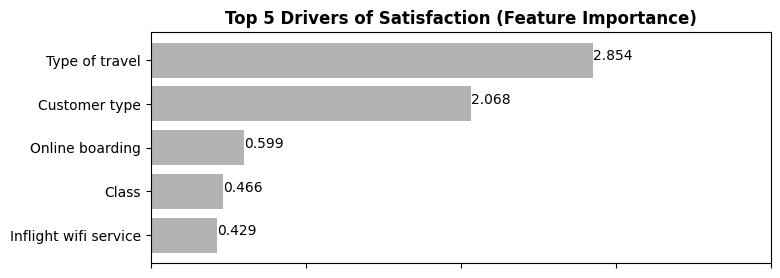

In [336]:
%matplotlib inline
import matplotlib.pyplot as plt; 
plt.rcdefaults()
import numpy as np
from matplotlib import rcParams
# figure size in inches
rcParams['figure.figsize'] = 8,3
 
objects = ('Inflight wifi service', 'Class', 'Online boarding', 'Customer type', 'Type of travel')
x_pos = np.arange(len(objects))
performance = [0.429, 0.466, 0.599, 2.068, 2.854]

plt.barh(x_pos, performance, align='center', alpha=0.5, color='dimgrey') 
plt.yticks(x_pos, objects)
plt.xticks([0, 1, 2, 3, 4], labels="") 
plt.title('Top 5 Drivers of Satisfaction (Feature Importance)', fontweight="bold")

for index, value in enumerate(performance):
    plt.text(value, index, str(value))  

plt.show()

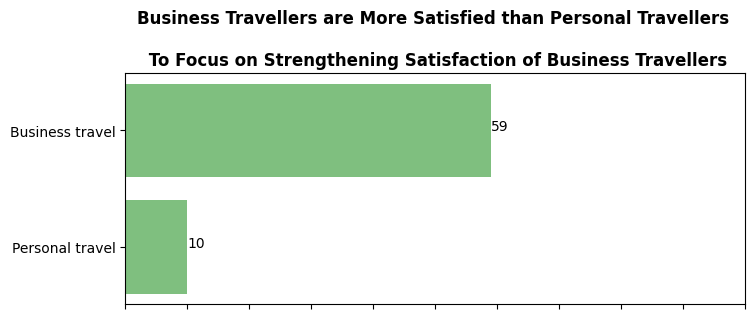

In [321]:
%matplotlib inline
import matplotlib.pyplot as plt; 
plt.rcdefaults()
import numpy as np
from matplotlib import rcParams
# figure size in inches
rcParams['figure.figsize'] = 8,3
 
objects = ('Personal travel', 'Business travel')
x_pos = np.arange(len(objects))
performance = [10, 59]

plt.barh(x_pos, performance, align='center', alpha=0.5, color='green') 
plt.yticks(x_pos, objects)
plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], labels="") 
plt.title('Business Travellers are More Satisfied than Personal Travellers \n \n To Focus on Strengthening Satisfaction of Business Travellers', fontweight="bold")

for index, value in enumerate(performance):
    plt.text(value, index, str(value))

plt.show()

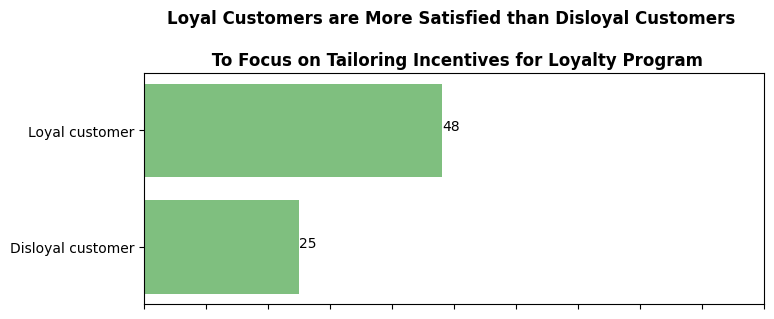

In [318]:
%matplotlib inline
import matplotlib.pyplot as plt; 
plt.rcdefaults()
import numpy as np
from matplotlib import rcParams
# figure size in inches
rcParams['figure.figsize'] = 8,3
 
objects = ('Disloyal customer', 'Loyal customer')
x_pos = np.arange(len(objects))
performance = [25, 48]

plt.barh(x_pos, performance, align='center', alpha=0.5, color='green') 
plt.yticks(x_pos, objects)
plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], labels="") 
plt.title('Loyal Customers are More Satisfied than Disloyal Customers \n \n To Focus on Tailoring Incentives for Loyalty Program', fontweight="bold")

for index, value in enumerate(performance):
    plt.text(value, index, str(value))

plt.show()

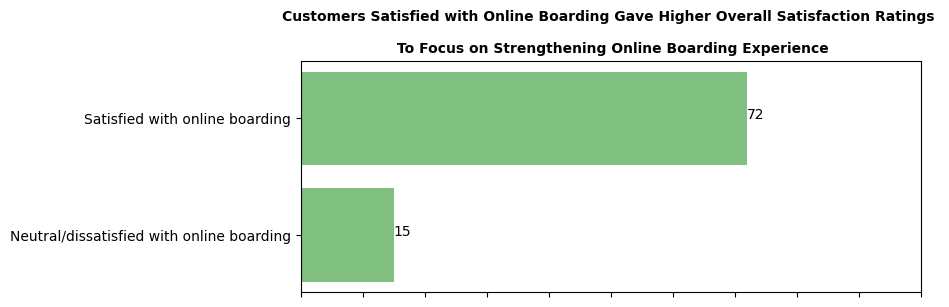

In [325]:
%matplotlib inline
import matplotlib.pyplot as plt; 
plt.rcdefaults()
import numpy as np
from matplotlib import rcParams
# figure size in inches
rcParams['figure.figsize'] = 8,3
 
objects = ('Neutral/dissatisfied with online boarding', 'Satisfied with online boarding') 
x_pos = np.arange(len(objects))
performance = [15, 72]

plt.barh(x_pos, performance, align='center', alpha=0.5, color='green') 
plt.yticks(x_pos, objects)
plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], labels="") 
plt.title('Customers Satisfied with Online Boarding Gave Higher Overall Satisfaction Ratings \n \n To Focus on Strengthening Online Boarding Experience', fontweight="bold", fontsize=10)

for index, value in enumerate(performance):
    plt.text(value, index, str(value))

plt.show()

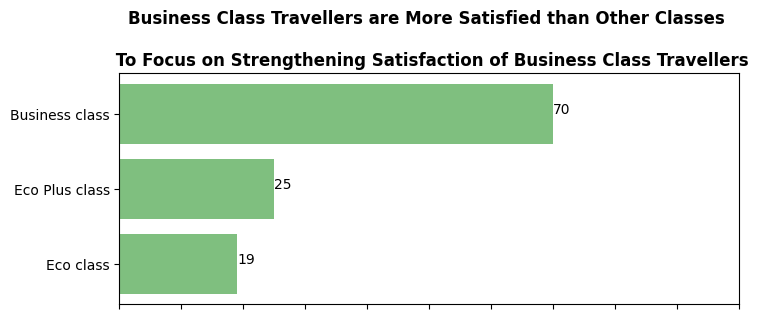

In [319]:
%matplotlib inline
import matplotlib.pyplot as plt; 
plt.rcdefaults()
import numpy as np
from matplotlib import rcParams
# figure size in inches
rcParams['figure.figsize'] = 8,3
 
objects = ('Eco class', 'Eco Plus class', 'Business class')
x_pos = np.arange(len(objects))
performance = [19, 25, 70]

plt.barh(x_pos, performance, align='center', alpha=0.5, color='green') 
plt.yticks(x_pos, objects)
plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], labels="") 
plt.title('Business Class Travellers are More Satisfied than Other Classes \n \n To Focus on Strengthening Satisfaction of Business Class Travellers', fontweight="bold")

for index, value in enumerate(performance):
    plt.text(value, index, str(value))

plt.show()

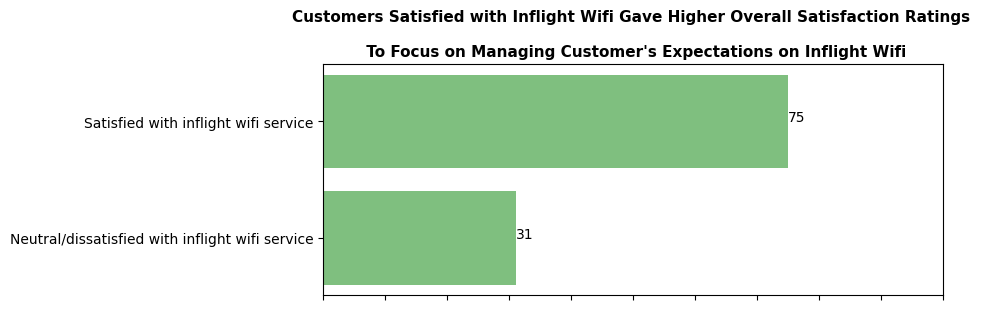

In [326]:
%matplotlib inline
import matplotlib.pyplot as plt; 
plt.rcdefaults()
import numpy as np
from matplotlib import rcParams
# figure size in inches
rcParams['figure.figsize'] = 8,3
 
objects = ('Neutral/dissatisfied with inflight wifi service', 'Satisfied with inflight wifi service') 
x_pos = np.arange(len(objects))
performance = [31, 75]

plt.barh(x_pos, performance, align='center', alpha=0.5, color='green') 
plt.yticks(x_pos, objects)
plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], labels="") 
# plt.xlabel('Satisfaction')
plt.title("Customers Satisfied with Inflight Wifi Gave Higher Overall Satisfaction Ratings \n \n To Focus on Managing Customer's Expectations on Inflight Wifi", fontweight="bold", fontsize=11)

for index, value in enumerate(performance):
    plt.text(value, index, str(value))

plt.show()